## Test the agent performance with various models under different conditions

We haven't found a good test that uses an image for either input or response, so we'll have to define our own. We'll award point for products returned and descriptions, then compare among different models.

1. Rating each product returned: Use the ESCI method: 
    - Exact match: 3 points
    - Substitute: 2 points
    - Complementary: 1 points
    - Incompatible: 0 points
2. Rating description: Up to 1 point total:
    - Accurate summary: 1 point

Note that the first two code boxes of the notebook have to be re-run for each run. Furthermore, models need to be reloaded when appropriate and the appropriate database extracted.

Uses Python environment 3.12 locally.

### The products for comparison

Blue sofa


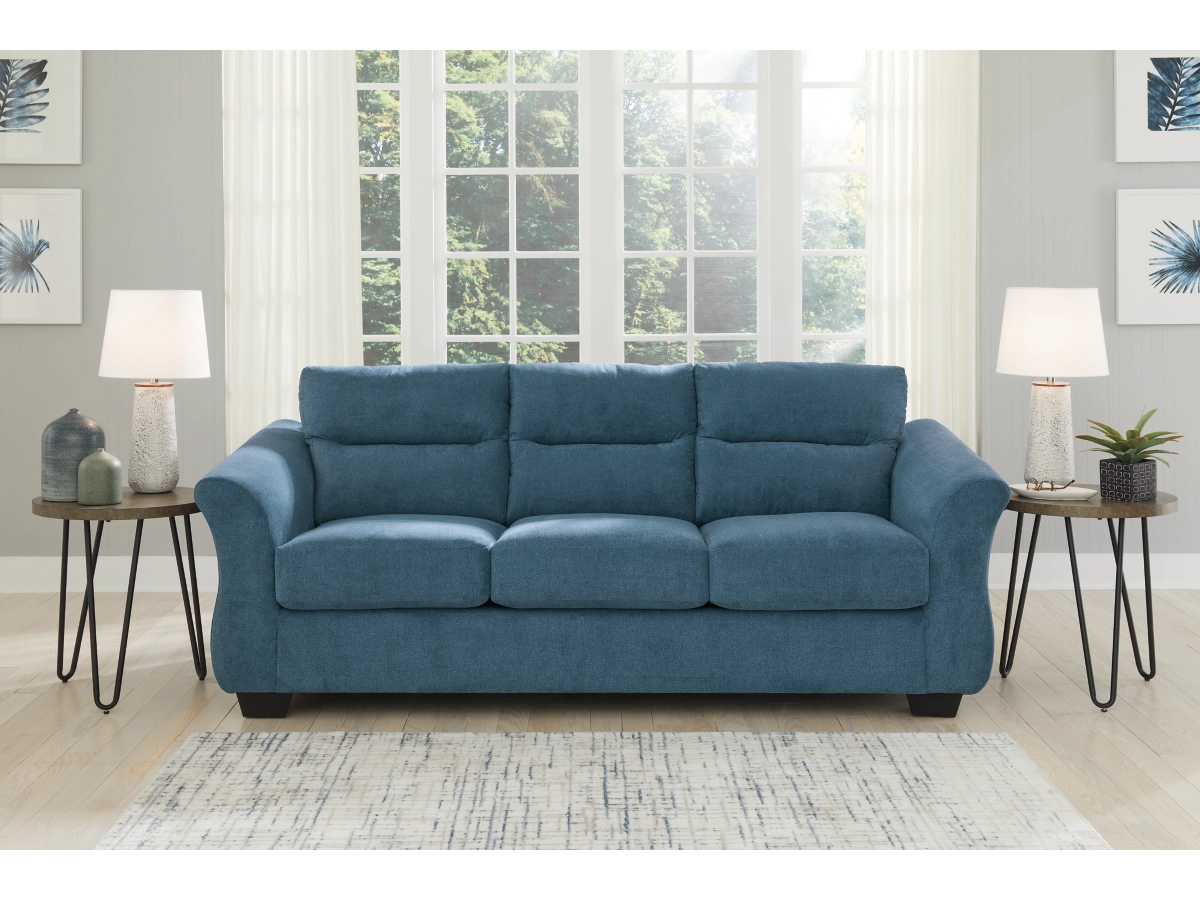

In [5]:
print('Blue sofa')
display(Image.open('../../assets/random-internet-sofa.webp'))

Funky shoes


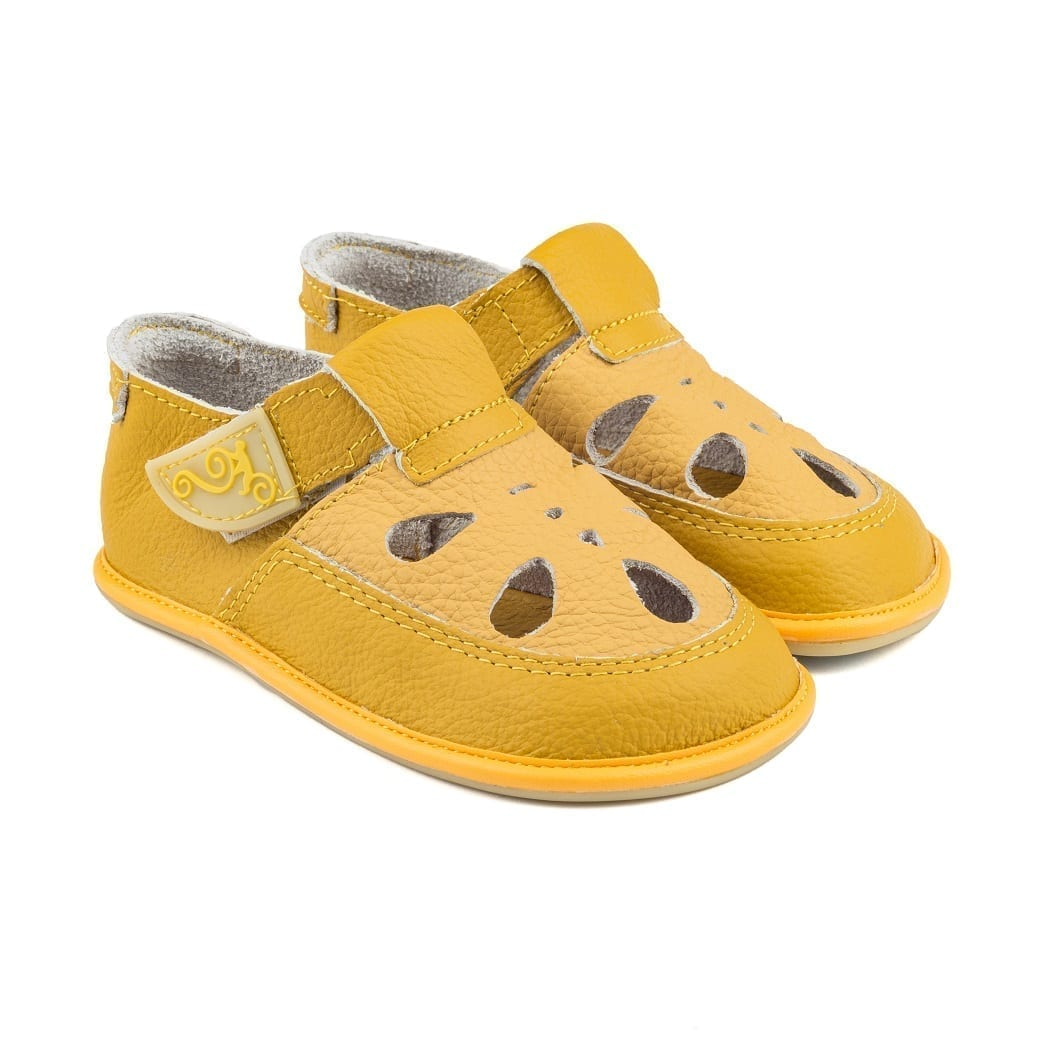

In [6]:
print('Funky shoes')
display(Image.open('../../assets/funky shoes.jpg'))

Black cell phone case


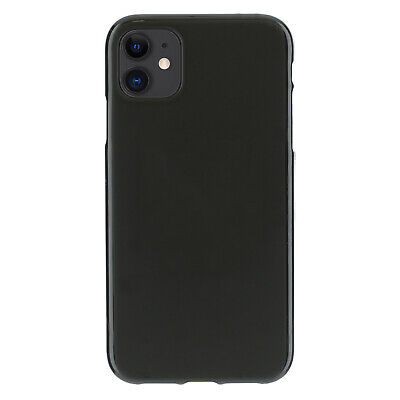

In [7]:
print('Black cell phone case')
display(Image.open('../../assets/cell phone case.jpg'))

### Starting code

In [1]:
import base64
import io
import os

os.environ["BLIP_2_MODEL"]="coco"
os.environ["BLIP_2_PORT"]="9002"
os.environ["CHROMA_PORT"]="8000"
os.environ["CHROMA_MAX_IMAGES_PER_ITEM"]="21"
os.environ["CHROMA_MAX_ITEMS"]="3"
os.environ["OLLAMA_PORT"]="11434"
os.environ["OLLAMA_MODEL"]="llama3.1:8b"
os.environ["ABO_DIR_CONTAINER"]="/mnt/d/abo-dataset"

from LangGraph_agent import prompt
from PIL import Image
from IPython.display import display

Using Chroma collection blip_2_coco


We're going to be running a lot of prompts, so define a function to help write the output.

In [2]:
def write_chunk(chunk):
    if chunk:  # Skip empty lines
        if chunk.get("images"):
            # Handle images
            for idx, base64_image in enumerate(chunk["images"]):
                if base64_image:
                    print(f"Product {idx+1}")
                    display(Image.open(io.BytesIO(base64.b64decode(base64_image))))
        if chunk.get("text"):
            # Handle text tokens
            print(f"{chunk['text']}", end="")

## Test 1: Multimodal BLIP-2 Embeddings

### 1.A: Coco fine-tuned off-the-shelf

#### 1.A.i: A sofa

1. 1 point: complimentary, failure to follow instructions, no summary
2. 2 points: substitute, failure to follow instructions, no summary
3. 0 points: incompatible, failure to follow instructions, no summary

3 points total

ic| 'In retrieve_products'
ic| query["text"]: 'black sofa'


Product 1


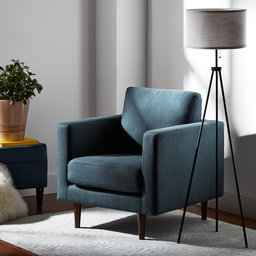

Product 2


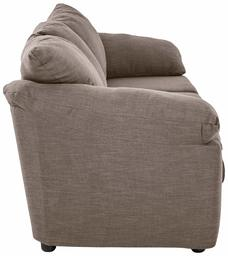

Product 3


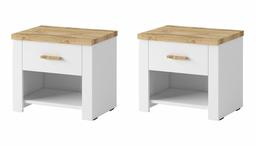

ic| docs_content: ('Item 1: {item name: Amazon Brand – Rivet Modern Wave Cosmopolitan Area Rug,  '
                   '5 x 7 Foot,  Beige}; {brand: Rivet}; {product type: RUG}; {color: Beige}; '
                   '{style: 0}; {material: polyethylene}; {country: US}; {marketplace: Amazon}; '
                   "{domain name: amazon.com}; {item keywords: ['area-rugs',  'area rugs',  "
                   "'rugs',  'rug',  'area rug',  'rugs for living room',  'area rugs 8x10 "
                   "clearance',  'outdoor rug',  'area rugs 5x7 clearance under 50',  '8x10 area "
                   "rug',  'area rugs 8x10',  'Rivet',  'mid century',  'modern',  'BEIGE',  "
                   '\'Brown\',  "5\'x7\'",  \'area rugs\',  \'shag area rug\',  \'small area '
                   "rug',  'round area rug',  'gray area rug',  'outdoor area rug',  'large area "
                   "rugs',  'black and white area rug',  'pink area rug',  'living room area "
                   "rugs',  'wool are

However, I don't see an image of the sofa you're referring to. Can you please describe it or provide more information about what you like about it? Such as:

* The style (modern, traditional, mid-century modern)
* The size
* The material (leather, fabric, velvet)
* Any unique features (e.g. tufting, stitching)

This will help me give you a better idea of how to find or describe the sofa you're looking for.

Also, are you looking to buy a new sofa online or in-store?

In [ ]:
imgpath = '../../assets/random-internet-sofa.webp'
with open(imgpath, 'rb') as f:
    test_image = base64.b64encode(f.read()).decode("utf-8")
async for chunk in prompt(chat_id="1", prompt="I want a black sofa like this one.", image_b64=test_image):
    write_chunk(chunk)

#### 1.A.ii: Kids' shoes

1. 0 points: irrelevant, no summary
2. 0 points: irrelevant, no summary
3. 1 points: complementary, good summary

1 points total

ic| 'In retrieve_products'
ic| query["text"]: 'shoes in blue'


Product 1


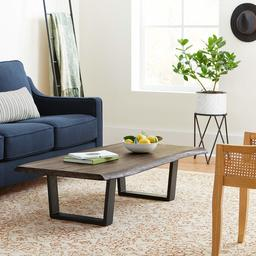

Product 2


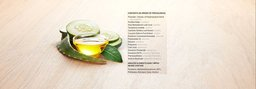

Product 3


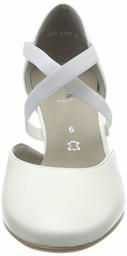

ic| docs_content: ('Item 1: {item name: Stone & Beam Throw-Blankets Teal}; {brand: Stone & '
                   'Beam}; {product type: HOME BED AND BATH}; {country: GB}; {marketplace: '
                   'Amazon}; {domain name: amazon.co.uk}; 
                  '
                   '
                  '
                   'Item 2: {item name: American Brand Diapers Variation Test,  Size 2}; {brand: '
                   'American}; {country: US}; {marketplace: Amazon}; {domain name: amazon.com}; '
                   '{bullet point: Umbilical cord cutout Breathable backsheet keeps baby dry No '
                   'harmful dyes or additives used}; 
                  '
                   '
                  '
                   "Item 3: {item name: find. Amazon Brand Men's Woven Leather Loafer}; {brand: "
                   'find.}; {model name: Woven Leather}; {product type: SHOES}; {style: Woven '
                   'Leather}; {country: CA}; {marketplace: Amazon}; {domain name: amazon.c

After searching through my database, I found a few products that might match what you're looking for.

Here are the results:

1. **find. Amazon Brand Men's Woven Leather Loafer**
   This is an Amazon brand men's shoe made with woven leather, and it comes in various styles including suede leather. The product is from Canada and sold on Amazon.ca.
   
2. Note: Unfortunately, there is no information about blue shoes among the provided products.

3. No information was given about blue shoes for any other items in this list.

In [ ]:
imgpath = '../../assets/funky shoes.jpg'
with open(imgpath, 'rb') as f:
    test_image = base64.b64encode(f.read()).decode("utf-8")
async for chunk in prompt(chat_id="1", prompt="I want these shoes in blue.", image_b64=test_image):
    write_chunk(chunk)

#### 1.A.iii: Cell phone case

1. 1 point: irrelevant, good summary
2. 1 point: irrelevant, good summary
3. 1 point: irrelevant, good summary

3 points total

ic| 'In retrieve_products'
ic| query["text"]: 'red cell phone case'


Product 1


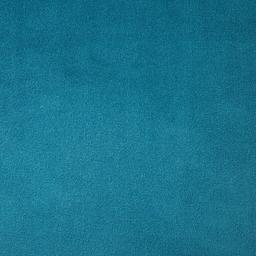

Product 2


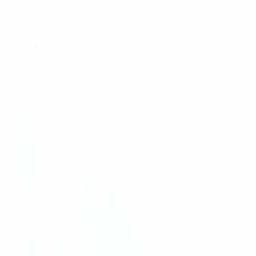

Product 3


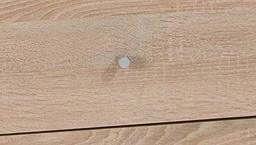

ic| docs_content: ('Item 1: {item name: Movian Up Round}; {brand: []}; {product type: CHAIR}; '
                   '{color: []}; {style: []}; {material: []}; {pattern: []}; {country: DE}; '
                   '{marketplace: Amazon}; {domain name: amazon.de}; {item keywords: []}; '
                   '{bullet point: []}; 
                  '
                   '
                  '
                   'Item 2: {item name: Movian Atran}; {brand: []}; {product type: TABLE}; '
                   '{color: []}; {style: []}; {country: DE}; {marketplace: Amazon}; {domain '
                   'name: amazon.de}; {item keywords: []}; {bullet point: []}; 
                  '
                   '
                  '
                   'Item 3: {item name: Movian Morava}; {brand: []}; {product type: CABINET}; '
                   '{color: []}; {style: []}; {material: []}; {country: DE}; {marketplace: '
                   'Amazon}; {domain name: amazon.de}; {item keywords: []}; {bullet point: []}; ')


I found the closest matches to what you're looking for in my database.

Here are the products that match your request:

1. **Movian Up Round**
   This product is a chair from Germany, available on Amazon.de.

2. **Movian Atran**
   This product is a table from Germany, available on Amazon.de.

3. **Movian Morava**
   This product is a cabinet made of unknown material, from Germany, available on Amazon.de.

In [3]:
imgpath = '../../assets/cell phone case.jpg'
with open(imgpath, 'rb') as f:
    test_image = base64.b64encode(f.read()).decode("utf-8")
async for chunk in prompt(chat_id="1", prompt="A red cell phone case like this one.", image_b64=test_image):
    write_chunk(chunk)

### 1.B: Pretrained model

## Test 1: Word input BLIP-2 embeddings only

#### 1.B.i: A sofa

1. 1 point: complimentary, failure to follow instructions, no summary
2. 2 points: substitute, failure to follow instructions, no summary
3. 0 points: incompatible, failure to follow instructions, no summary

3 points total

In [ ]:
imgpath = '../../assets/random-internet-sofa.webp'
with open(imgpath, 'rb') as f:
    test_image = base64.b64encode(f.read()).decode("utf-8")
async for chunk in prompt(chat_id="1", prompt="I want a black sofa like this one.", image_b64=test_image):
    write_chunk(chunk)

#### 1A: The Google Shopping fine-tuned model

It clearly provides useless results.

In [2]:
async for chunk in prompt(chat_id="1", prompt="sofa"):
    if chunk:  # Skip empty lines
        if chunk.get("images"):
            # Handle images
            for idx, base64_image in enumerate(chunk["images"]):
                if base64_image:
                    display(Image.open(io.BytesIO(base64.b64decode(base64_image))))
        if chunk.get("text"):
            # Handle text tokens
            print(f"{chunk['text']}", end="")

I found the closest matches to a "sofa" in my database. Here are some products that may be related:

1. **JPGO Warm Face Cover for Cold Weather Soft Fleece Neck Gaiter Winter Skiing Balaclavas for Dust Wind Outdoor Sports, Fluffy Pink**
   This is a warm face cover designed to protect against cold weather, available in fluffly pink color.

2. **JPGO Warm Face Cover for Cold Weather Soft Fleece Neck Gaiter Winter Skiing Balaclavas for Dust Wind Outdoor Sports, Fluffy Grey**
   Similar to the previous product, this is a warm face cover designed for outdoor sports, but available in fluffly grey color.

3. **JPGO Warm Face Cover for Cold Weather Soft Fleece Neck Gaiter Winter Skiing Balaclavas for Dust Wind Outdoor Sports, Fluffy Black**
   Another variant of the warm face cover, this one is available in fluffly black color and designed for outdoor activities.